# Linear Classification

Lecture 2 on Linear Classification

Making use of MNIST dataset again.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.stats import mode

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
mnist = fetch_mldata('MNIST original', data_home='../data')

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
X = np.append(np.ones((mnist.data.shape[0],1)), mnist.data, axis = 1)

In [5]:
Y = mnist.target

In [6]:
def display(x, label):
    pixels = x.reshape((28, 28))
    plt.title('{label}'.format(label=label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

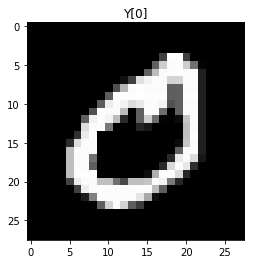

In [7]:
display(X[1][1:785], 'Y[0]')

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [9]:
w = np.random.rand(10, X_train.shape[1])
w_orig = w

In [10]:
w.dot(X_train[30000])

array([ 6011.85946806,  6227.60057534,  5690.30501678,  5800.5469033 ,
        6417.48371251,  5404.90304915,  6297.31555478,  5979.79529974,
        5455.80143217,  6112.37532299])

## Loss Function

In [11]:
def manhattan_distance(s1, s2):
    return np.sum(np.abs(s1 - s2), axis=1)

## Nearest Neighbour Classification

k-nearest neighbour

Method makes use of distance or loss measure. Training is O(1) and Test is O(n). At test time, we pick the k training examples which have least distance to test point. The mode of the k points is picked as the class for test point.

In [12]:
class NearestNeighbour:
    
    def __init__(self, k, loss = manhattan_distance):
        self.k = k
        self.loss = loss
        
    
    def train(self, X, Y):
        self.X = X
        self.Y = Y
        
        
    def test(self, X):
        losses = self.loss(self.X, X)
        return mode(self.Y[losses.argsort()[:self.k]])[0][0]
            

In [13]:
n = NearestNeighbour(1)
n.train(X_train, Y_train)

In [14]:
n.test(X_test[0])

7.0

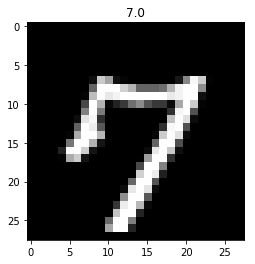

In [15]:
display(X_test[0][1:785], "%s"%Y_test[0])